In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

In [43]:
df = pd.read_csv("Gia SMP va SMPcap 2021(Giá thị trường SMP).csv")

In [44]:
MyColumn = df['9']

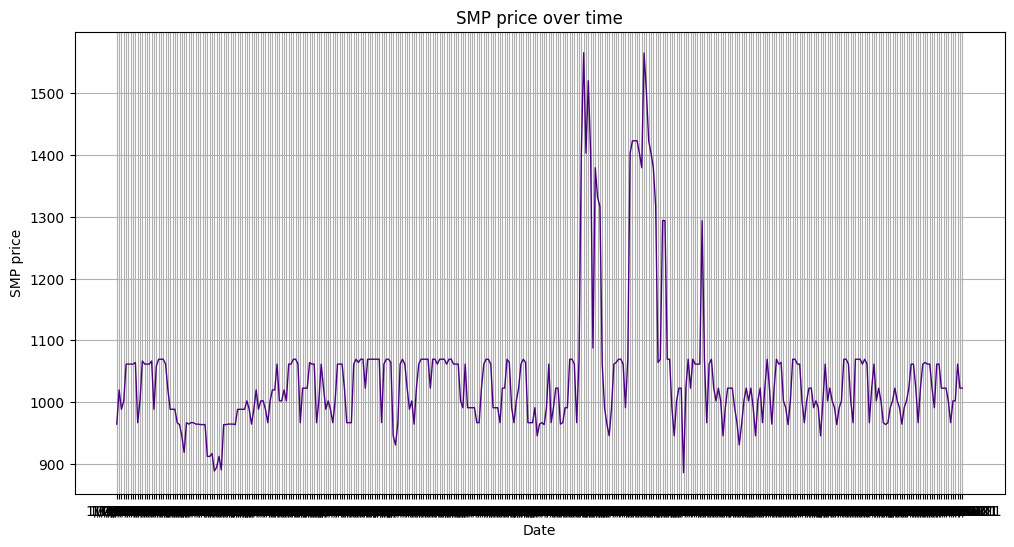

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], MyColumn, color='indigo', linewidth=1)
plt.title('SMP price over time')
plt.xlabel('Date')
plt.ylabel('SMP price')
plt.grid(True)
plt.show()

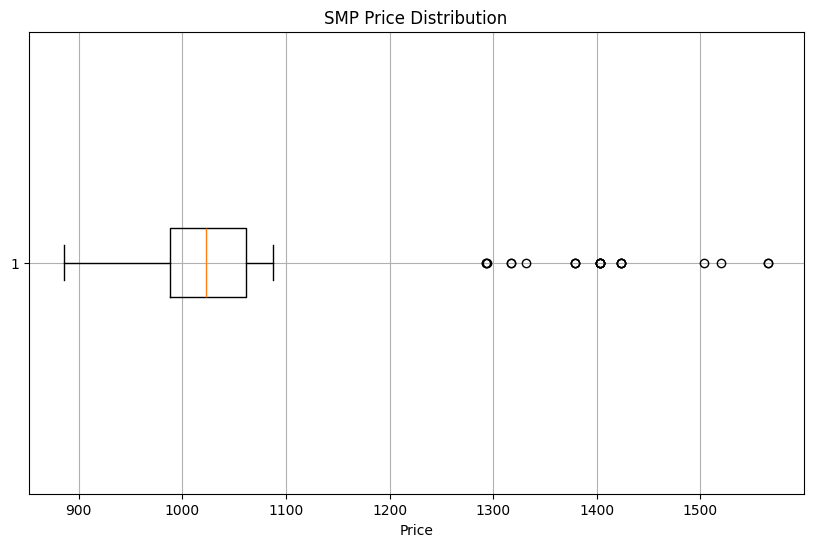

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(MyColumn, vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [51]:
IQR_Price = MyColumn.quantile(0.75) -MyColumn.quantile(0.25)
lower_Price_limit = MyColumn.quantile(0.25) - (IQR_Price * 1.5)
upper_Price_limit = MyColumn.quantile(0.75) + (IQR_Price * 1.5)
print(lower_Price_limit)
print(upper_Price_limit)
MyColumn= np.where(MyColumn > upper_Price_limit , upper_Price_limit ,#cau
                      np.where(MyColumn < lower_Price_limit , lower_Price_limit , MyColumn))

878.75
1171.15


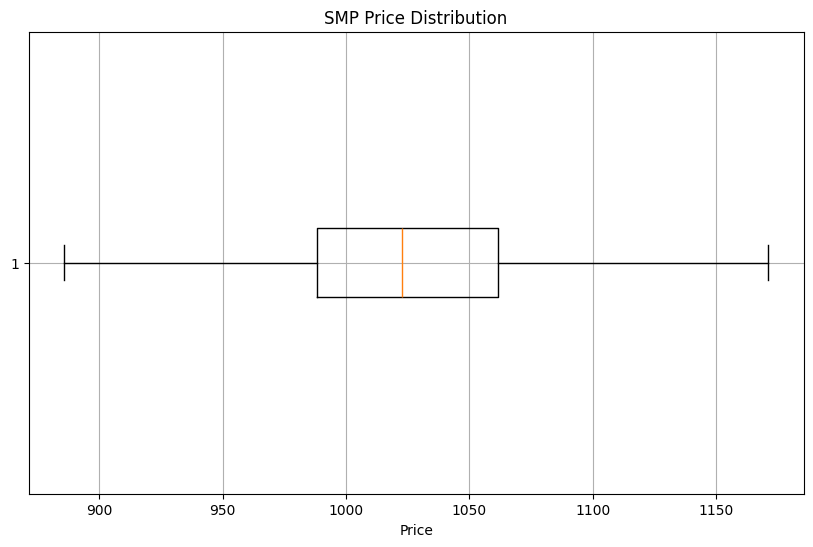

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot(MyColumn, vert=False)
plt.title(f'SMP Price Distribution')
plt.xlabel('Price')
plt.grid(True)
plt.show()

In [55]:
from sklearn.mixture import GaussianMixture

MyColumn= MyColumn.reshape(-1, 1)

num_components = 7  

gmm = GaussianMixture(n_components=num_components)
gmm.fit(MyColumn)

labels = gmm.predict(MyColumn)

means = gmm.means_
covariances = gmm.covariances_

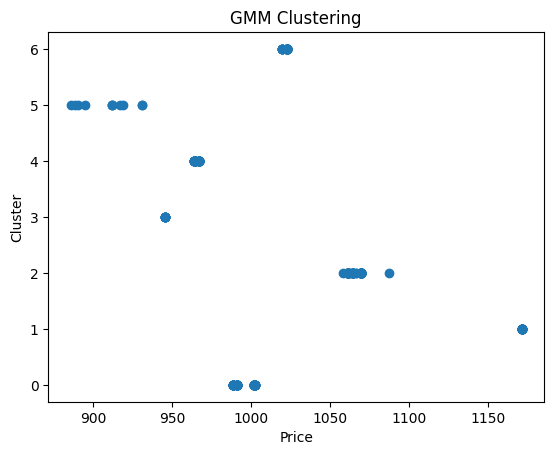

In [56]:
plt.scatter(MyColumn, labels)
plt.xlabel('Price')
plt.ylabel('Cluster')
plt.title('GMM Clustering')
plt.show()